In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

import imageio.v2 as imageio
import PIL
import scipy.ndimage as ndi
import PIL.Image
from collections import Counter

import tensorflow as tf
import keras
from tensorflow.keras.utils import img_to_array, array_to_img, to_categorical

# Load Data

In [332]:
train_dir = '../Capstone-Three-CNN/data/Training/'
test_dir = '../Capstone-Three-CNN/data/Testing/'

In [333]:
train_paths_unshuffled = []
train_labels_unshuffled = []

test_paths_unshuffled = []
test_labels_unshuffled = []

for label in os.listdir(train_dir):
    for image in os.listdir(f'{train_dir}{label}'):
        train_paths_unshuffled.append(f'{train_dir}{label}/{image}')
        train_labels_unshuffled.append(label)
    for image in os.listdir(f'{test_dir}{label}'):
        test_paths_unshuffled.append(f'{test_dir}{label}/{image}')
        test_labels_unshuffled.append(label)

In [6]:
def cat_percentages(label_list, length):
    counts = Counter(label_list)
    for label in np.unique(label_list):
        percent = round(counts[label] / len(label_list) * 100, 2)
        print(f'{label}: {percent}%')

In [7]:
print('Training label percentages: ')
cat_percentages(train_labels_unshuffled, len(train_labels_unshuffled))

print('Testing label percentages: ')
cat_percentages(test_labels_unshuffled, len(test_labels_unshuffled))

Training label percentages: 
glioma: 23.13%
meningioma: 23.44%
notumor: 27.92%
pituitary: 25.51%
Testing label percentages: 
glioma: 22.88%
meningioma: 23.34%
notumor: 30.89%
pituitary: 22.88%


*Train and test datasets are relatively balanced across categories.*

# Exploring the Data

Plot images, check sizes

In [235]:
def format_and_render_plot():
    # get current fig
    fig = plt.gcf()
    for ax in fig.axes:
        ax.legend(loc='center right')
    plt.show()

Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 252
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512)
Image type:  uint8
Min, max:  0 253
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512)
Image type:  uint8
Min, max:  0 255
Array shape:  (236, 214, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (449, 359, 3)
Image type:  uint8
Min, max:  0 248
Array shape:  (781, 733, 3)
Image type:  uint8
Min, max:  0 255


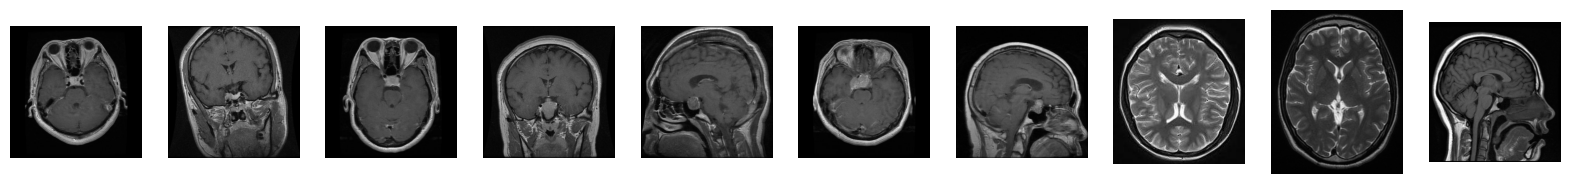

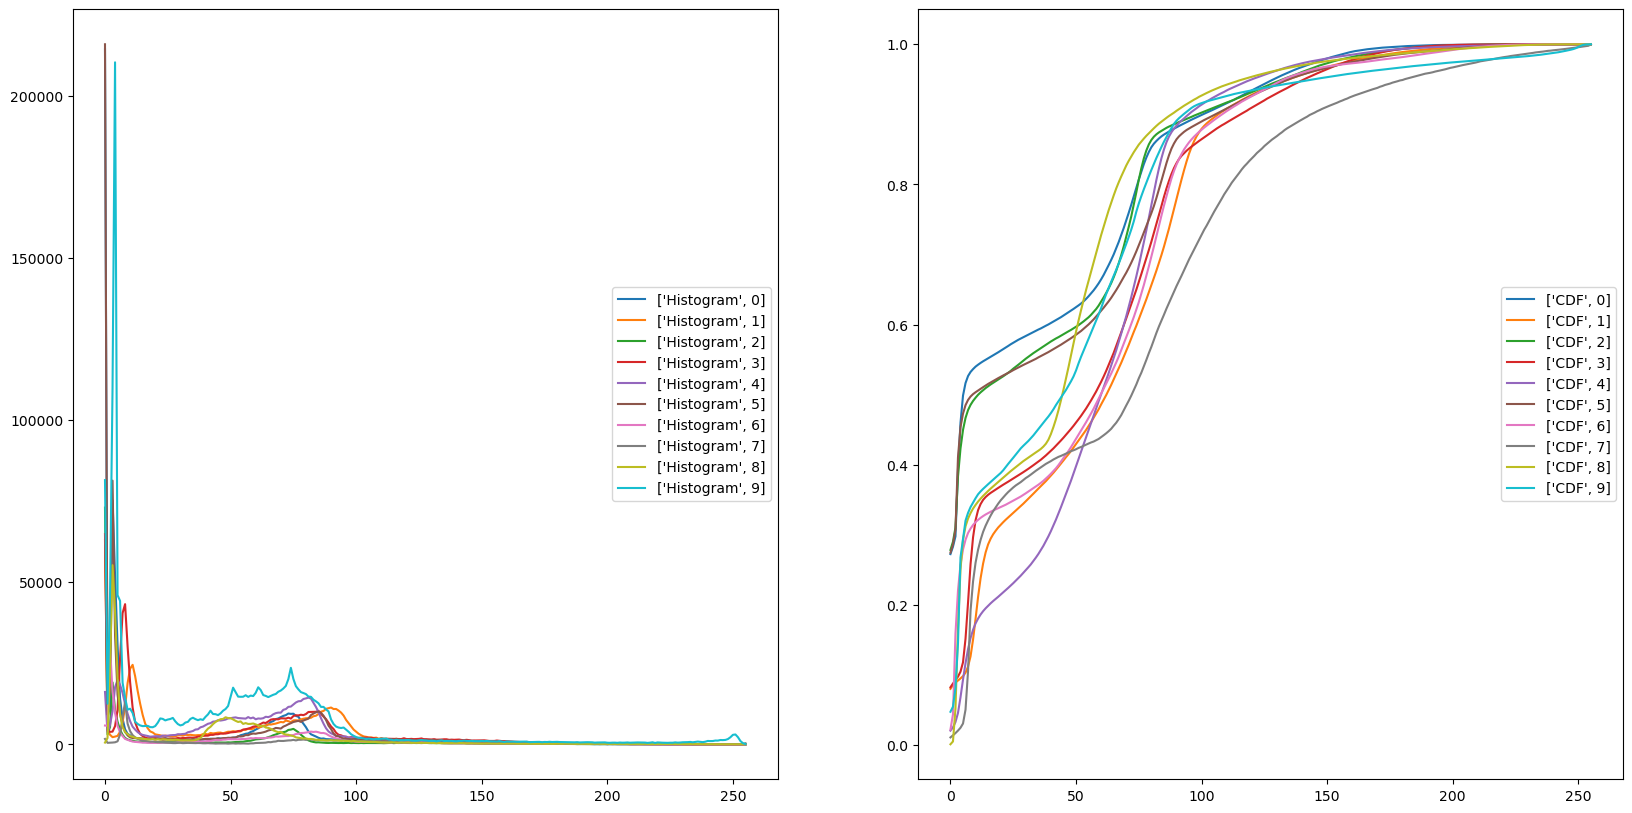

In [242]:
# print images (separated by 230)
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,10))
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for i in range(10):
    im = imageio.imread(train_paths_unshuffled[i*230])
    print('Array shape: ', im.shape)
    print('Image type: ', im.dtype)
    print('Min, max: ', im.min(), im.max())
    axes[i].imshow(im, cmap='gray')
    axes[i].axis('off')
    hist = ndi.histogram(im, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    axes1[0].plot(hist, label=['Histogram', i])
    axes1[1].plot(cdf, label=['CDF', i])
format_and_render_plot()

*Dataset contains images with differing shape/intensity*

In [342]:
# create dataset from directory with keras
train_im_dataset, val_im_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    class_names=['glioma', 'meningioma', 'notumor', 'pituitary'],
    color_mode='grayscale', # color_mode 'grayscale' produces color image
    batch_size=64,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
    interpolation='nearest',
    crop_to_aspect_ratio=False)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Using 1142 files for validation.


Many images are 'rbg' but have 3 identical RBG values and so appear grayscale. Converting to grayscale produces blue/green images.

Each of the 3 image channels alone are colored blue/green/yellow.

dtype: float32
Arr shape after transform: (256, 256, 1)


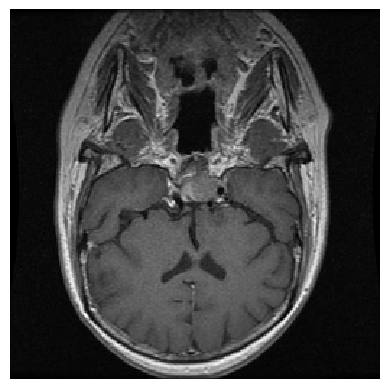

dtype: float32
Arr shape after transform: (256, 256, 1)


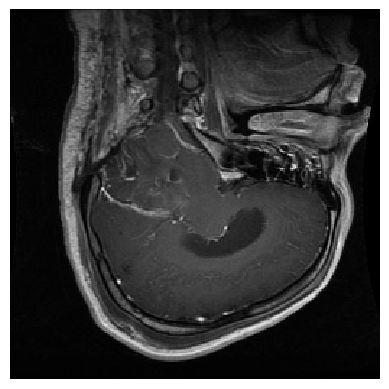

dtype: float32
Arr shape after transform: (256, 256, 1)


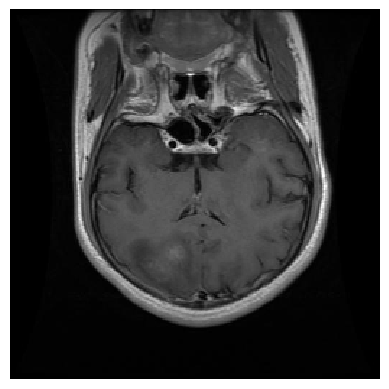

dtype: float32
Arr shape after transform: (256, 256, 1)


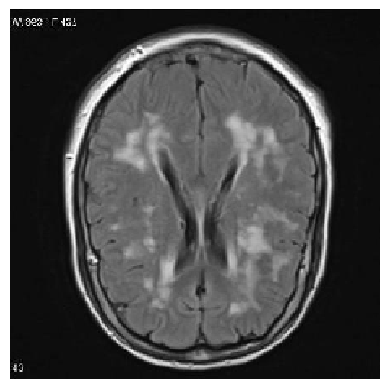

dtype: float32
Arr shape after transform: (256, 256, 1)


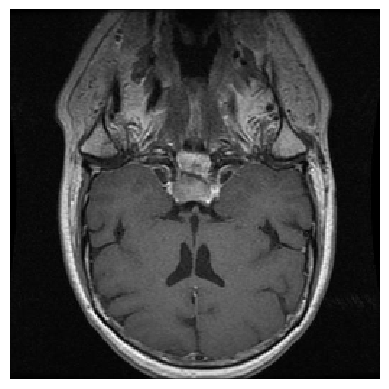

dtype: float32
Arr shape after transform: (256, 256, 1)


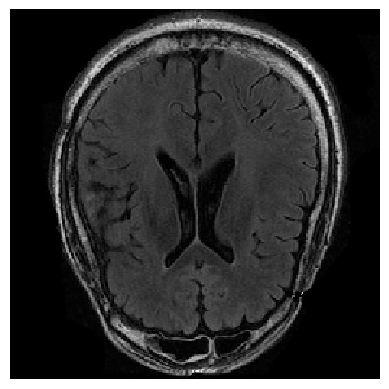

dtype: float32
Arr shape after transform: (256, 256, 1)


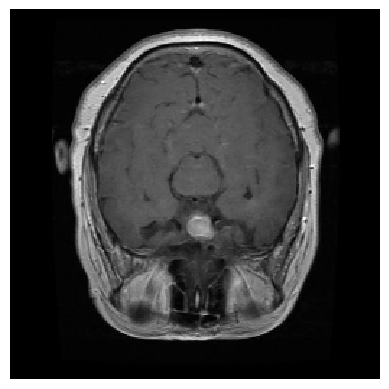

dtype: float32
Arr shape after transform: (256, 256, 1)


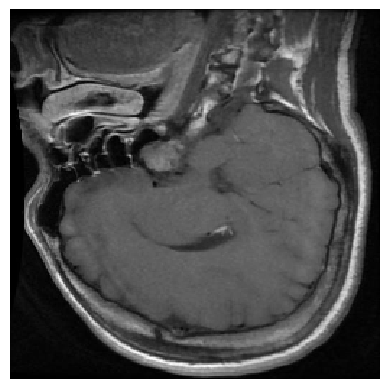

dtype: float32
Arr shape after transform: (256, 256, 1)


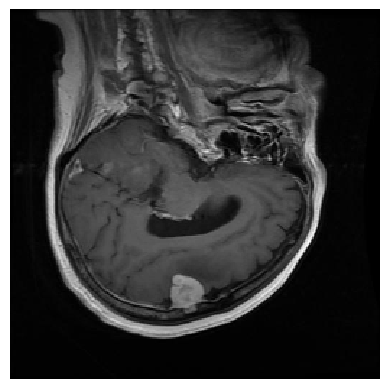

dtype: float32
Arr shape after transform: (256, 256, 1)


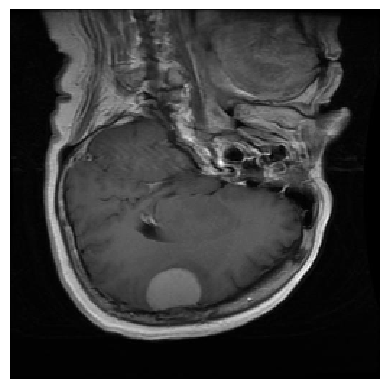

dtype: float32
Arr shape after transform: (256, 256, 1)


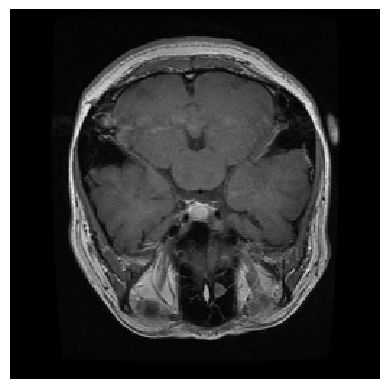

dtype: float32
Arr shape after transform: (256, 256, 1)


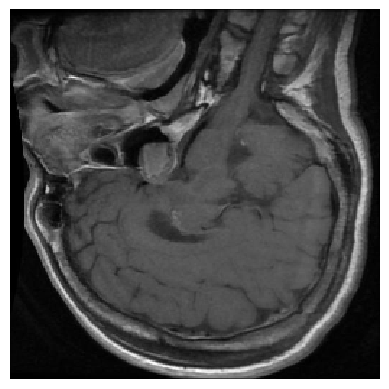

dtype: float32
Arr shape after transform: (256, 256, 1)


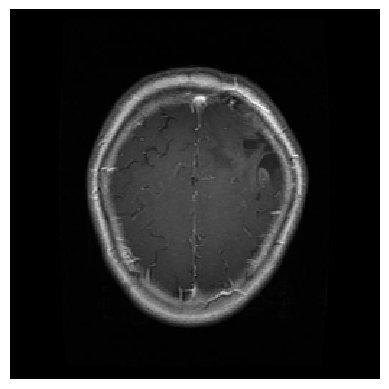

dtype: float32
Arr shape after transform: (256, 256, 1)


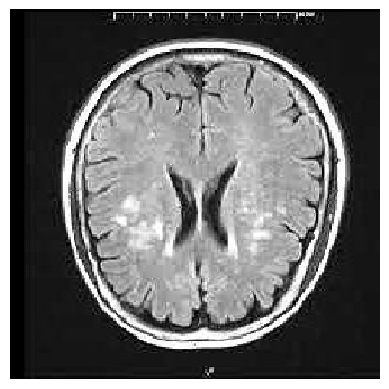

dtype: float32
Arr shape after transform: (256, 256, 1)


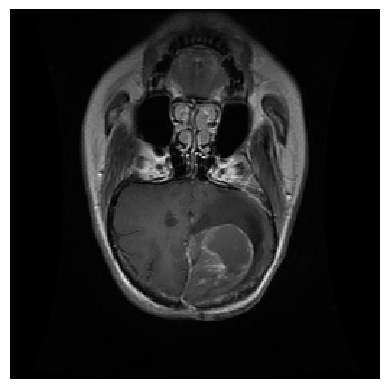

dtype: float32
Arr shape after transform: (256, 256, 1)


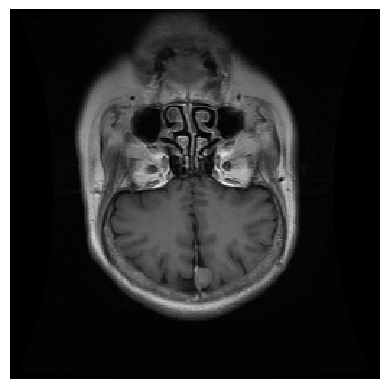

dtype: float32
Arr shape after transform: (256, 256, 1)


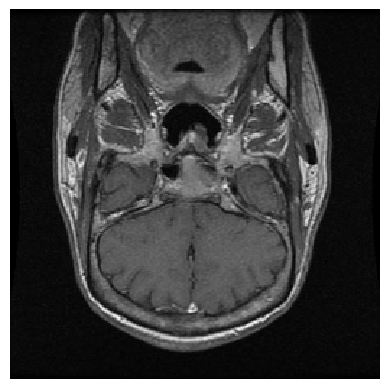

dtype: float32
Arr shape after transform: (256, 256, 1)


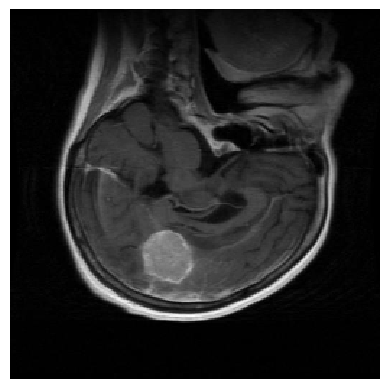

dtype: float32
Arr shape after transform: (256, 256, 1)


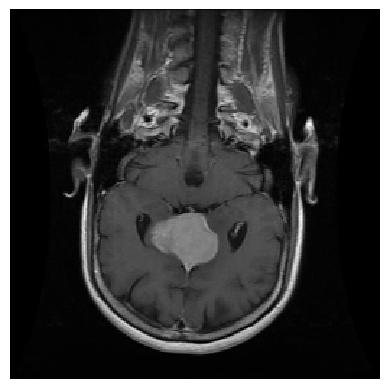

dtype: float32
Arr shape after transform: (256, 256, 1)


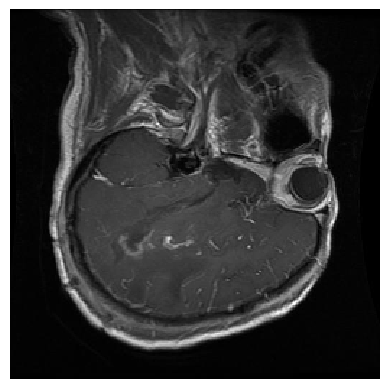

dtype: float32
Arr shape after transform: (256, 256, 1)


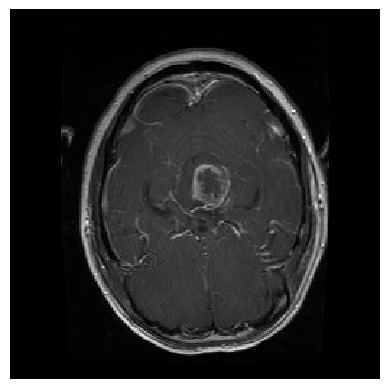

dtype: float32
Arr shape after transform: (256, 256, 1)


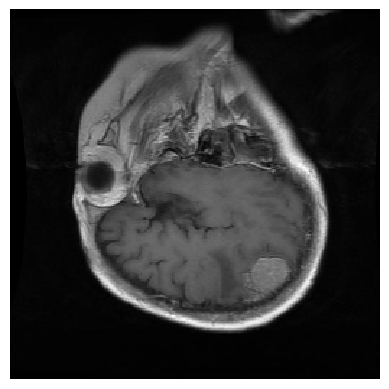

dtype: float32
Arr shape after transform: (256, 256, 1)


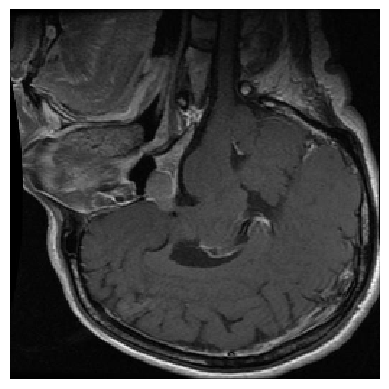

dtype: float32
Arr shape after transform: (256, 256, 1)


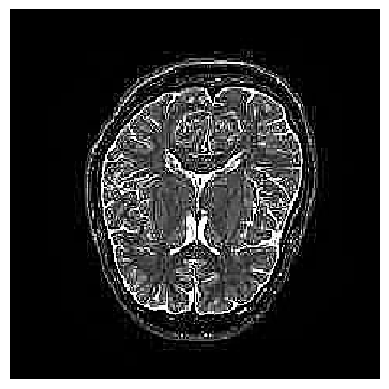

dtype: float32
Arr shape after transform: (256, 256, 1)


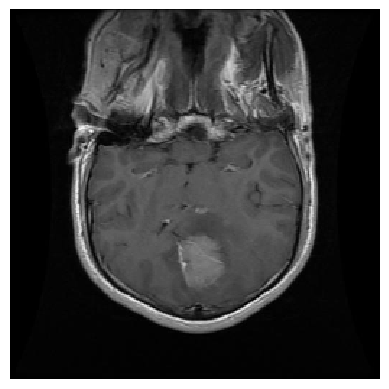

dtype: float32
Arr shape after transform: (256, 256, 1)


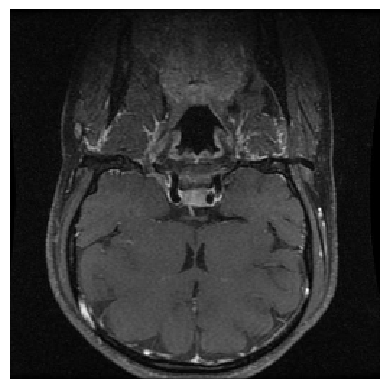

dtype: float32
Arr shape after transform: (256, 256, 1)


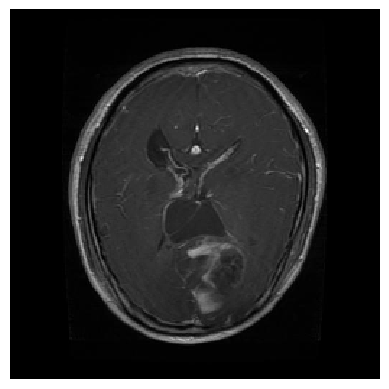

dtype: float32
Arr shape after transform: (256, 256, 1)


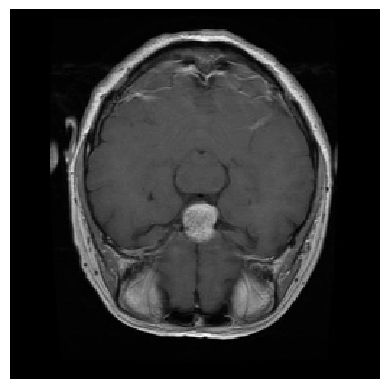

dtype: float32
Arr shape after transform: (256, 256, 1)


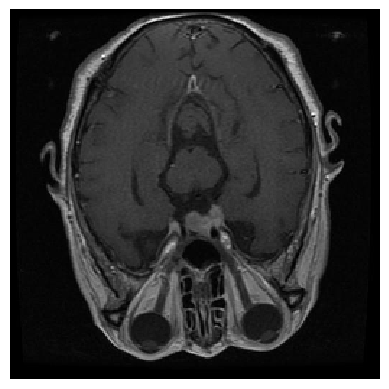

dtype: float32
Arr shape after transform: (256, 256, 1)


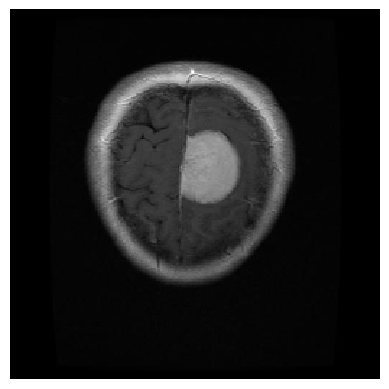

dtype: float32
Arr shape after transform: (256, 256, 1)


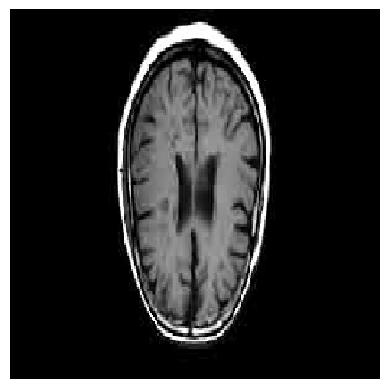

dtype: float32
Arr shape after transform: (256, 256, 1)


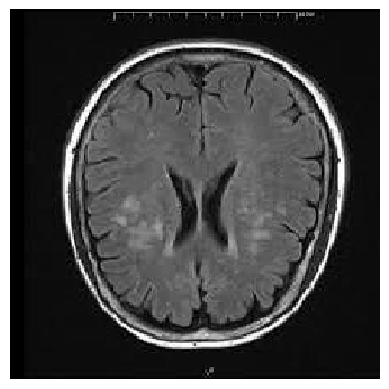

dtype: float32
Arr shape after transform: (256, 256, 1)


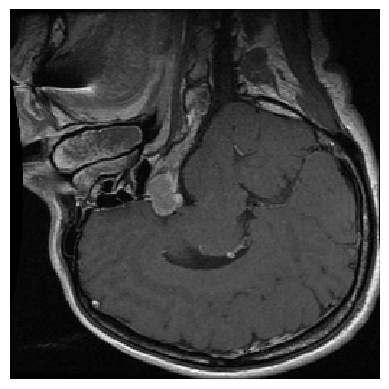

dtype: float32
Arr shape after transform: (256, 256, 1)


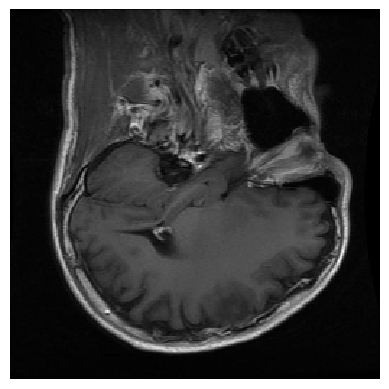

dtype: float32
Arr shape after transform: (256, 256, 1)


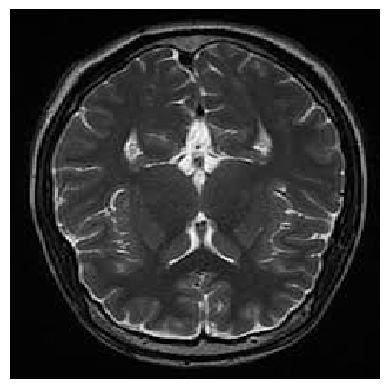

dtype: float32
Arr shape after transform: (256, 256, 1)


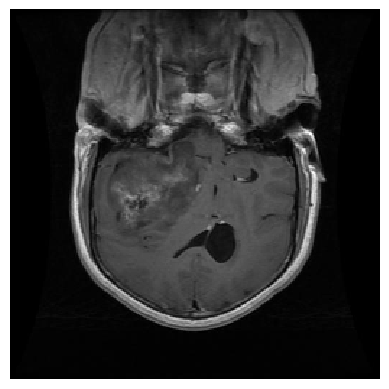

dtype: float32
Arr shape after transform: (256, 256, 1)


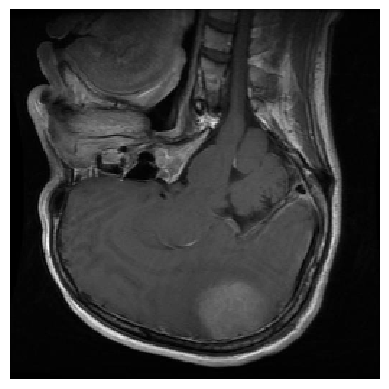

dtype: float32
Arr shape after transform: (256, 256, 1)


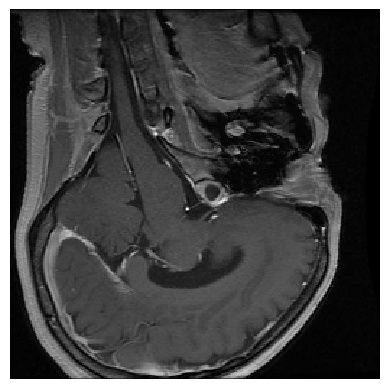

dtype: float32
Arr shape after transform: (256, 256, 1)


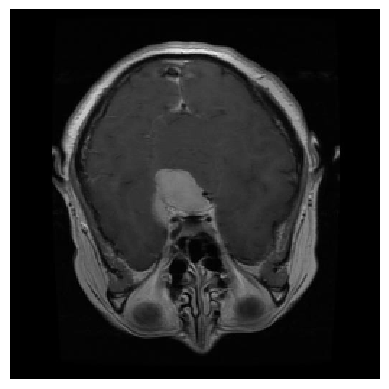

dtype: float32
Arr shape after transform: (256, 256, 1)


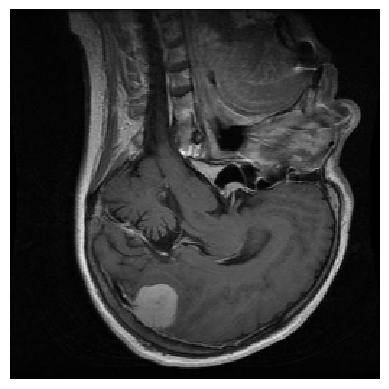

dtype: float32
Arr shape after transform: (256, 256, 1)


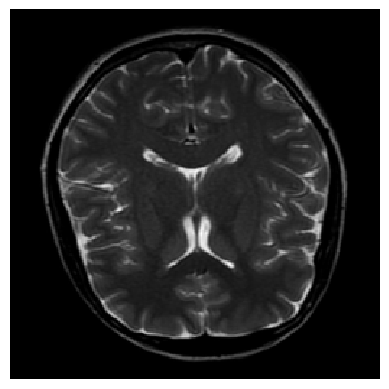

dtype: float32
Arr shape after transform: (256, 256, 1)


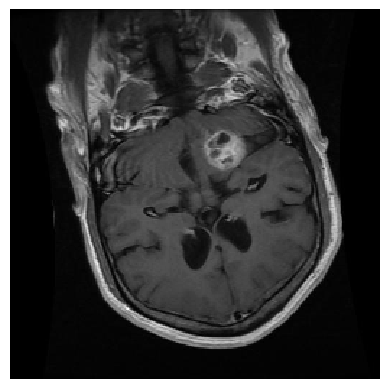

dtype: float32
Arr shape after transform: (256, 256, 1)


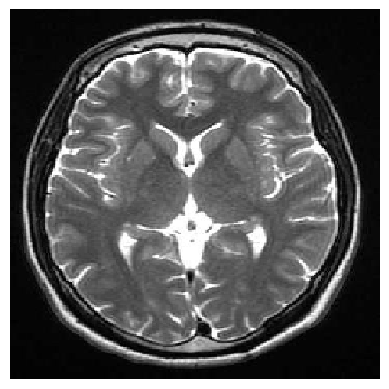

dtype: float32
Arr shape after transform: (256, 256, 1)


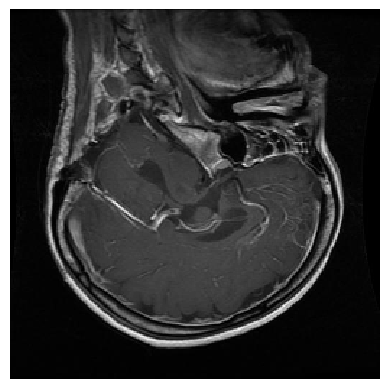

dtype: float32
Arr shape after transform: (256, 256, 1)


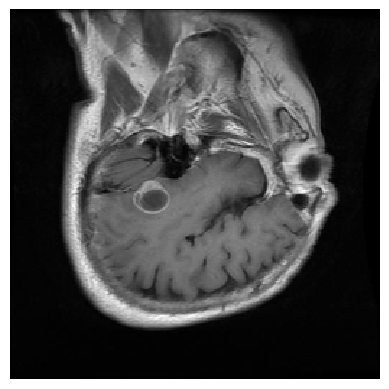

dtype: float32
Arr shape after transform: (256, 256, 1)


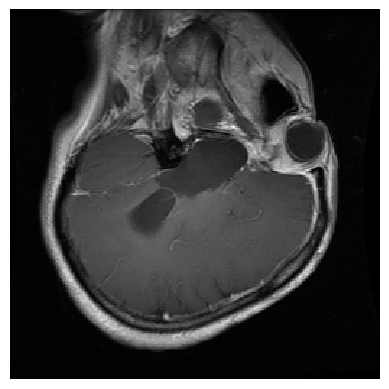

dtype: float32
Arr shape after transform: (256, 256, 1)


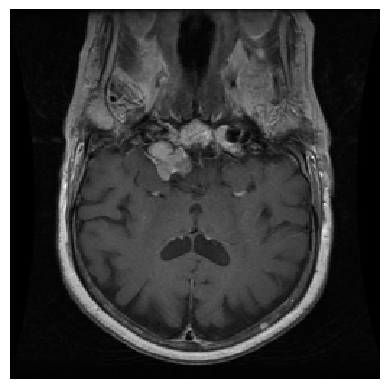

dtype: float32
Arr shape after transform: (256, 256, 1)


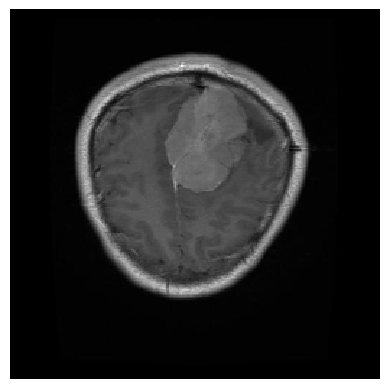

dtype: float32
Arr shape after transform: (256, 256, 1)


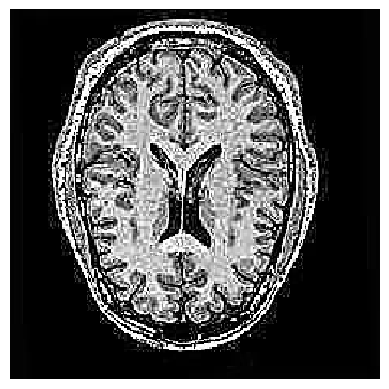

dtype: float32
Arr shape after transform: (256, 256, 1)


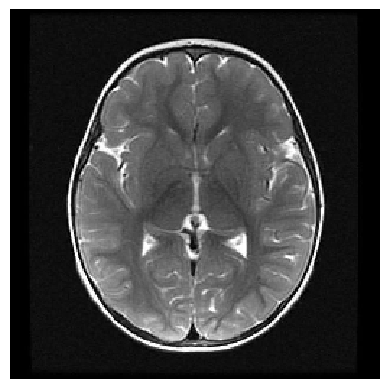

dtype: float32
Arr shape after transform: (256, 256, 1)


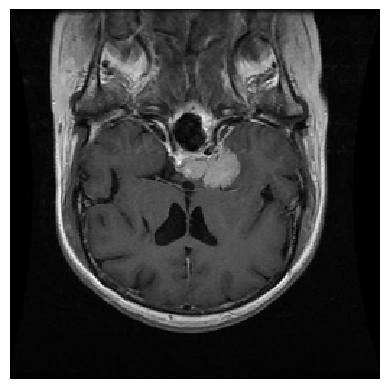

dtype: float32
Arr shape after transform: (256, 256, 1)


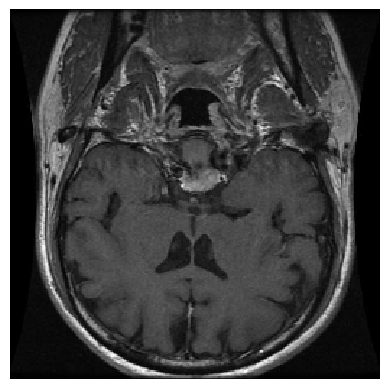

dtype: float32
Arr shape after transform: (256, 256, 1)


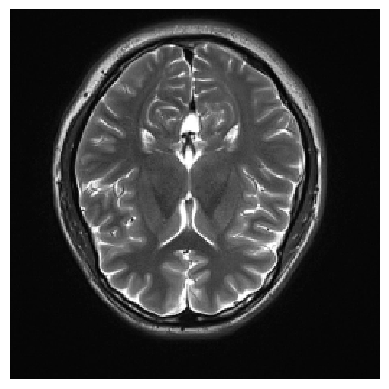

dtype: float32
Arr shape after transform: (256, 256, 1)


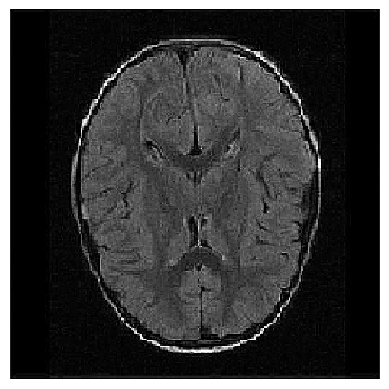

dtype: float32
Arr shape after transform: (256, 256, 1)


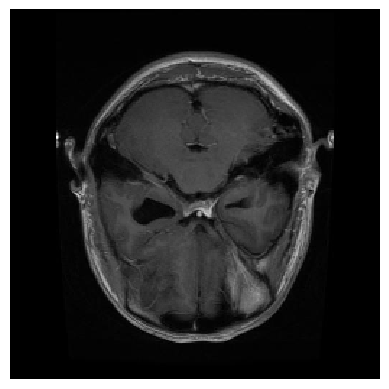

dtype: float32
Arr shape after transform: (256, 256, 1)


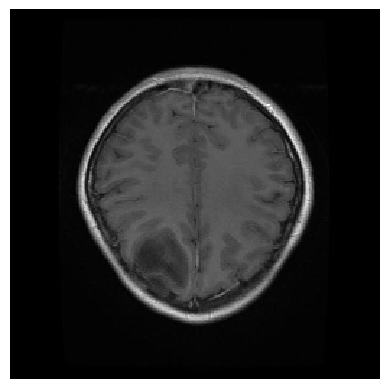

dtype: float32
Arr shape after transform: (256, 256, 1)


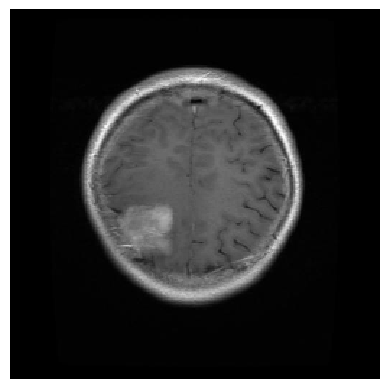

dtype: float32
Arr shape after transform: (256, 256, 1)


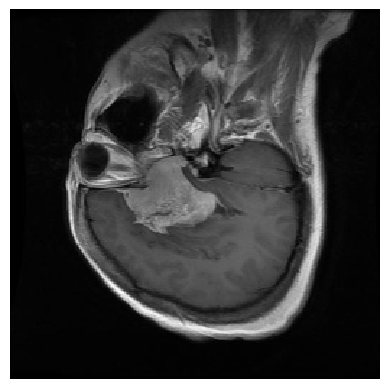

dtype: float32
Arr shape after transform: (256, 256, 1)


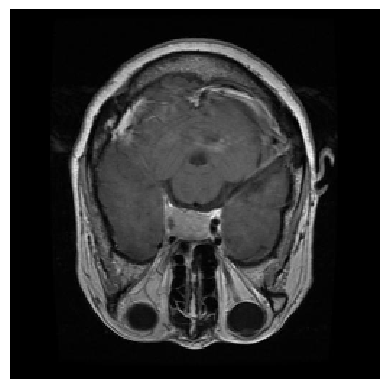

dtype: float32
Arr shape after transform: (256, 256, 1)


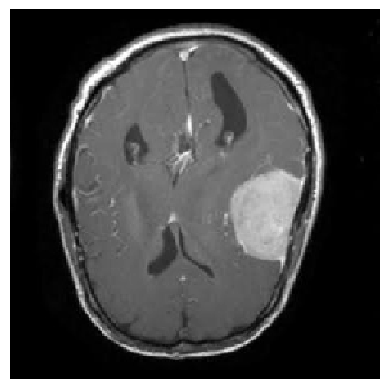

dtype: float32
Arr shape after transform: (256, 256, 1)


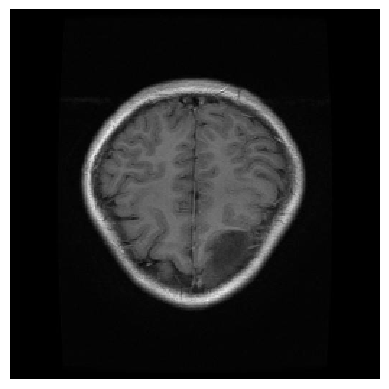

dtype: float32
Arr shape after transform: (256, 256, 1)


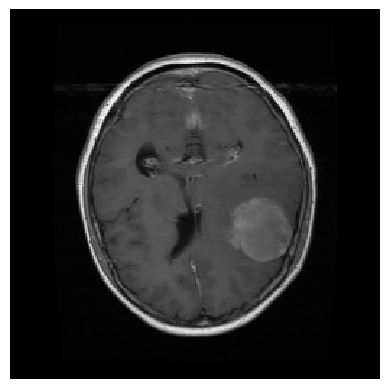

dtype: float32
Arr shape after transform: (256, 256, 1)


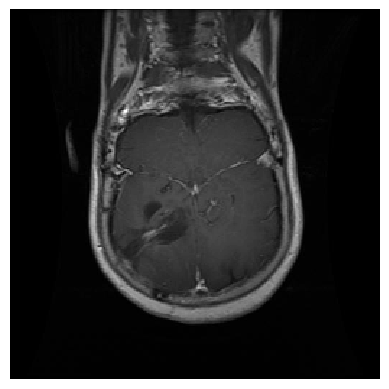

dtype: float32
Arr shape after transform: (256, 256, 1)


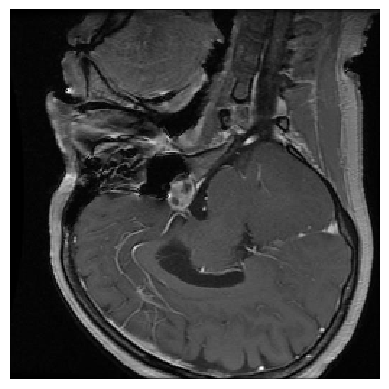

In [343]:
# assess and normalize

for images, labels in train_im_dataset.take(1):  #takes 1 batch out of train_im_dataset
    for i in range(len(images)):    #range(len(images)) is size of 1 batch - 64
        #print(f'Shape before transform: {images[i].shape}')
        tf_labels = labels
        arr = img_to_array(images[i]).astype('float32') / 255. #normalize values across possible integers 0 to 255
        print(f'dtype: {arr.dtype}')
        print(f'Arr shape after transform: {arr.shape}')
        #img = images[i][:,:,2]  #select only third RGB channel
        plt.imshow(arr, cmap='gray')
        plt.axis('off')
        plt.show()

plt.figure(figsize=(10, 10))
for images, labels in train_im_dataset.take(1):  #makes dataset out of 1 batch of 64 of train_im_dataset
    for i in range(len(images)):    #range(len(images)) is size of 1 batch - 64
        print(f'Shape before transform: {images[i].shape}')
        tf_labels = labels
        img = np.mean(images[i], axis=2)
        arr = img_to_array(img).astype('float32') / 255. #normalize values across possible integers 0 to 255
        print(f'Channel values: {img_array[0][0]}') #channel_last, R=G=B but not uniform across images
        print(f'dtype: {arr.dtype}')
        print(f'Arr shape after transform: {arr.shape}')
        ax = plt.subplot(3, 3, i + 1)
        #img = images[i][:,:,2]  #select only third RGB channel
        plt.imshow(arr, cmap='gray')
        plt.axis('off')
        plt.show()

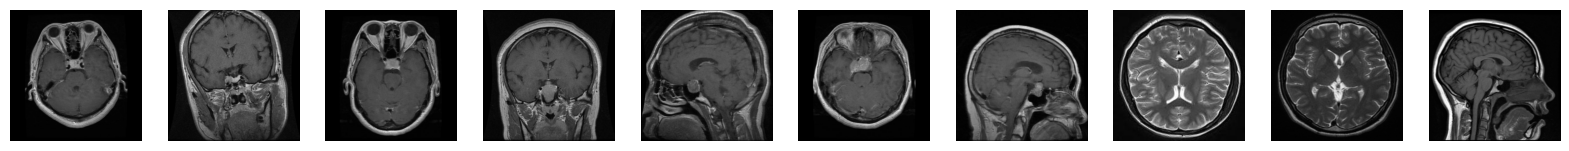

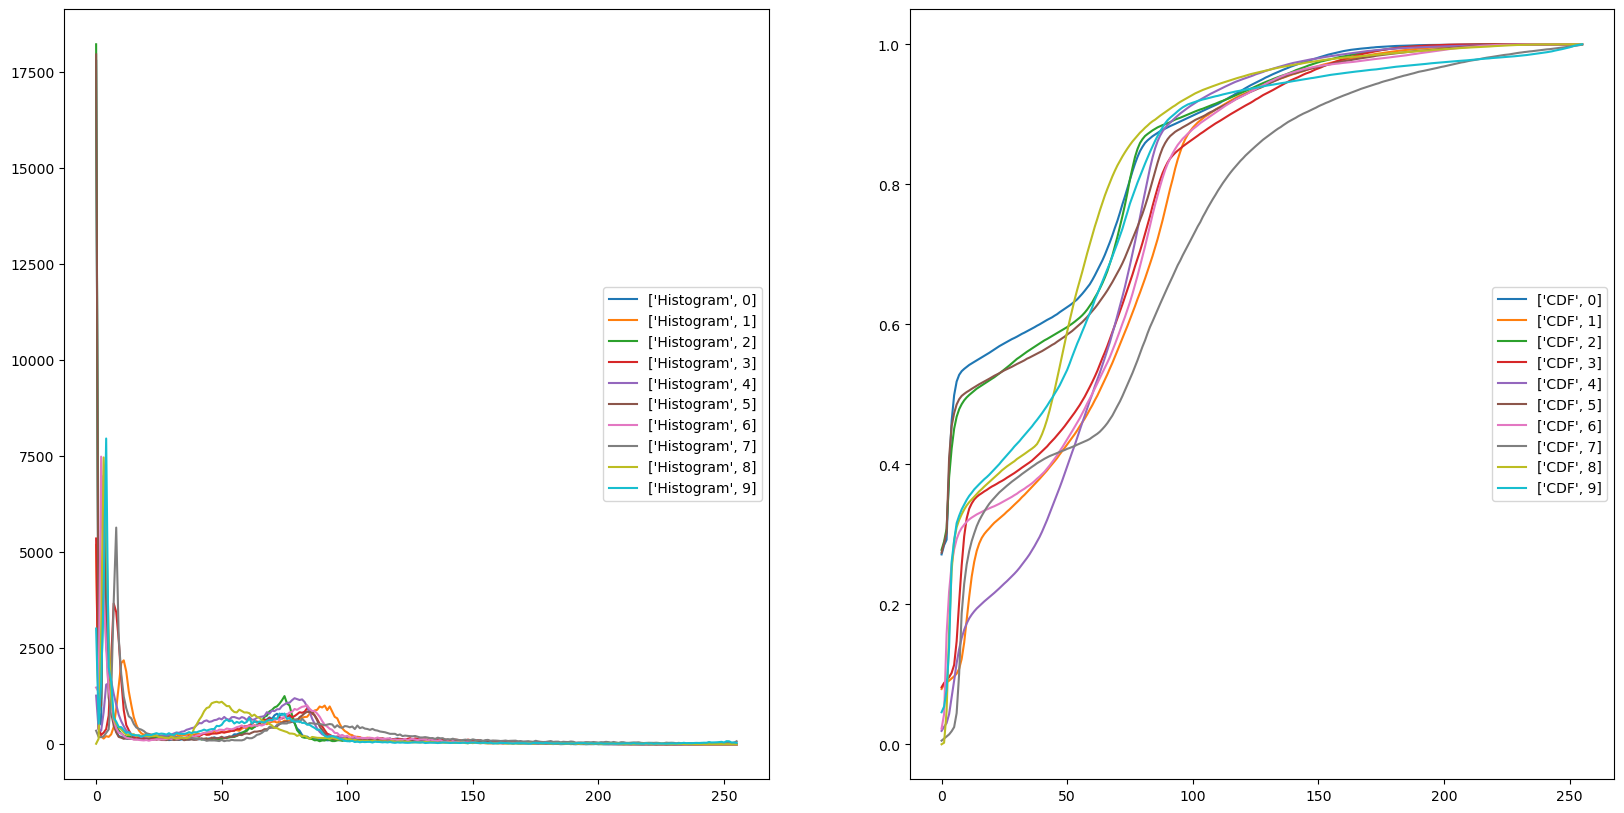

In [244]:
# plot images from resized and normalized array
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,20))
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
for i in range(10):
    arr = train_im_array*255
    PIL_image = Image.fromarray(arr[i*230])
    axes[i].imshow(PIL_image, cmap='gray')
    axes[i].axis('off')
    hist = ndi.histogram(PIL_image, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    axes1[0].plot(hist, label=['Histogram', i])
    axes1[1].plot(cdf, label=['CDF', i])
format_and_render_plot()

After some preprocessing, images hist appears more uniform

In [ ]:
# unused functions

In [74]:
# function to resize
def resize_image(input_image):
    #shape = input_image.shape
    #if len(shape) < 3:
        #im = np.expand_dims(im, axis=0)
    im_resized = tf.image.resize(input_image, (256,256), method='bilinear', preserve_aspect_ratio=True, antialias=True)
    return im_resized
    
# function to normalize and convert to float32
def normalize(input_image):
    input_im = tf.cast(input_image, tf.float32) / 255.0
    return input_im

# function to convert color -- will need to do this to mask as well
def convert_grayscale(input_image):
    input_im = input_image.convert('L')
    return input_im

In [ ]:
# load and transform train and test images
def load_train_image(input_image):
    image = normalize(input_image)
    image = resize_image(image)
    image = convert_grayscale(image)
    return image

In [ ]:
# create image input to dataset pipeline with tf


**Thresholding**

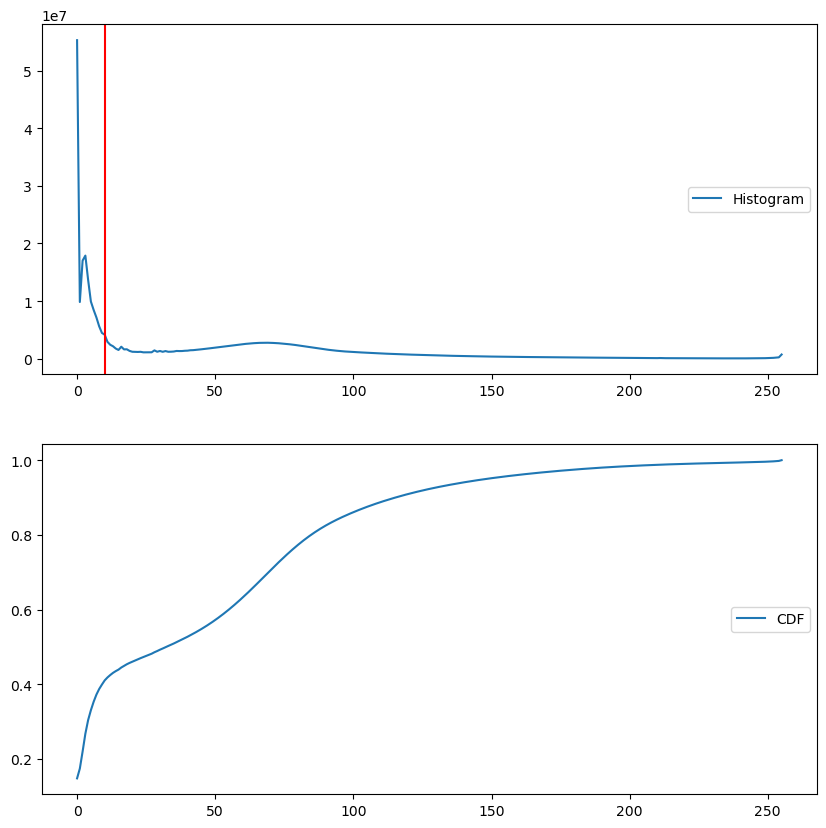

In [254]:
# all images histogram
hist = ndi.histogram(train_im_array*255, min=0, max=255, bins=256)
cdf = hist.cumsum() / hist.sum()

fig, axes = plt.subplots(2, 1, figsize=(10,10))
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
axes[0].axvline(x=10, color='r')
format_and_render_plot()

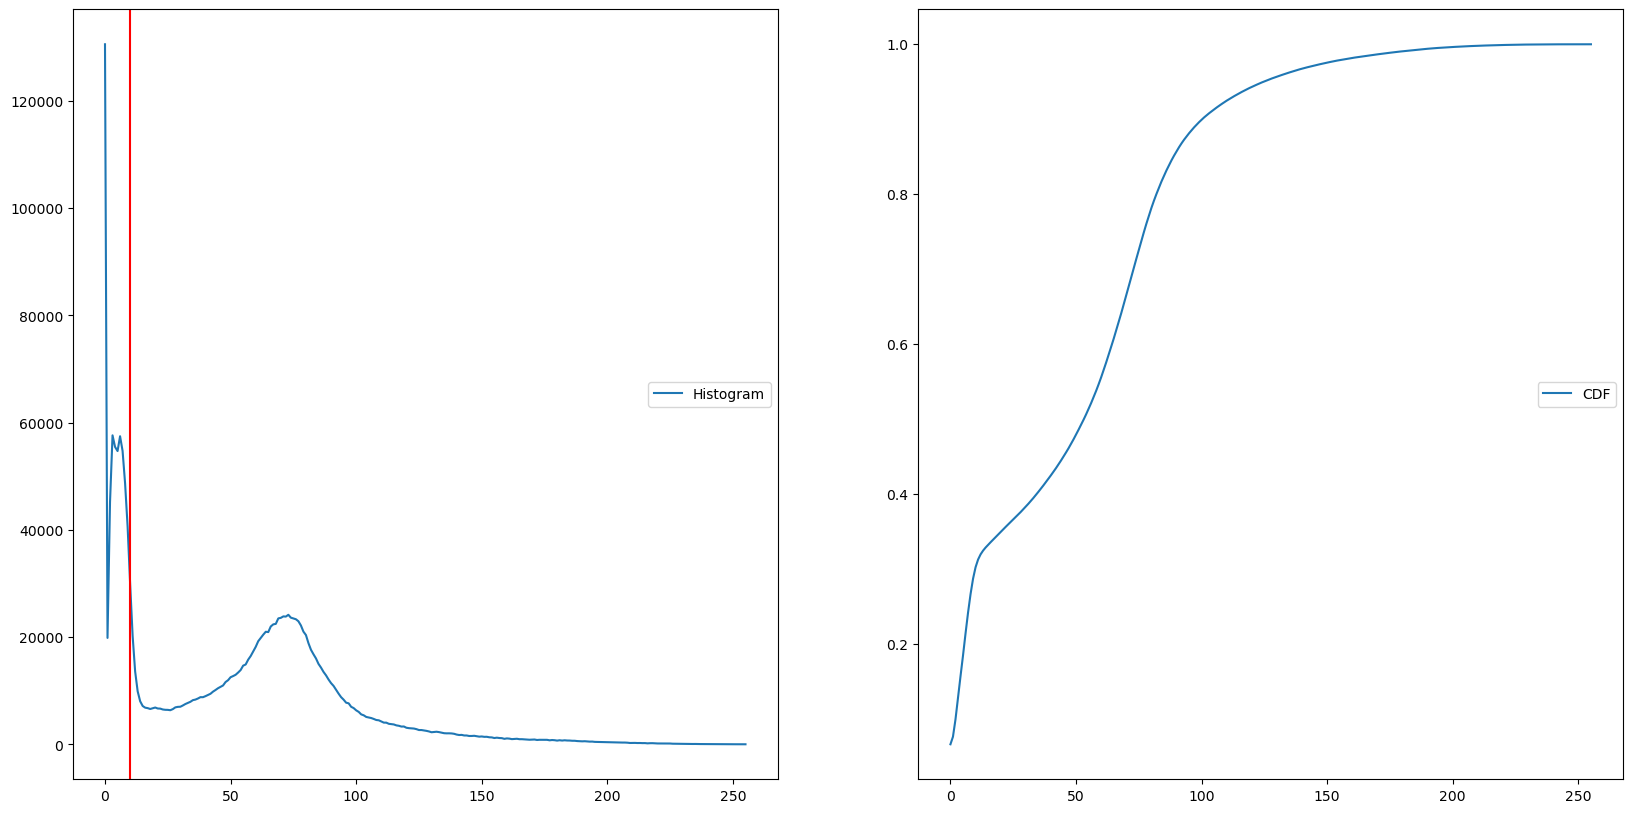

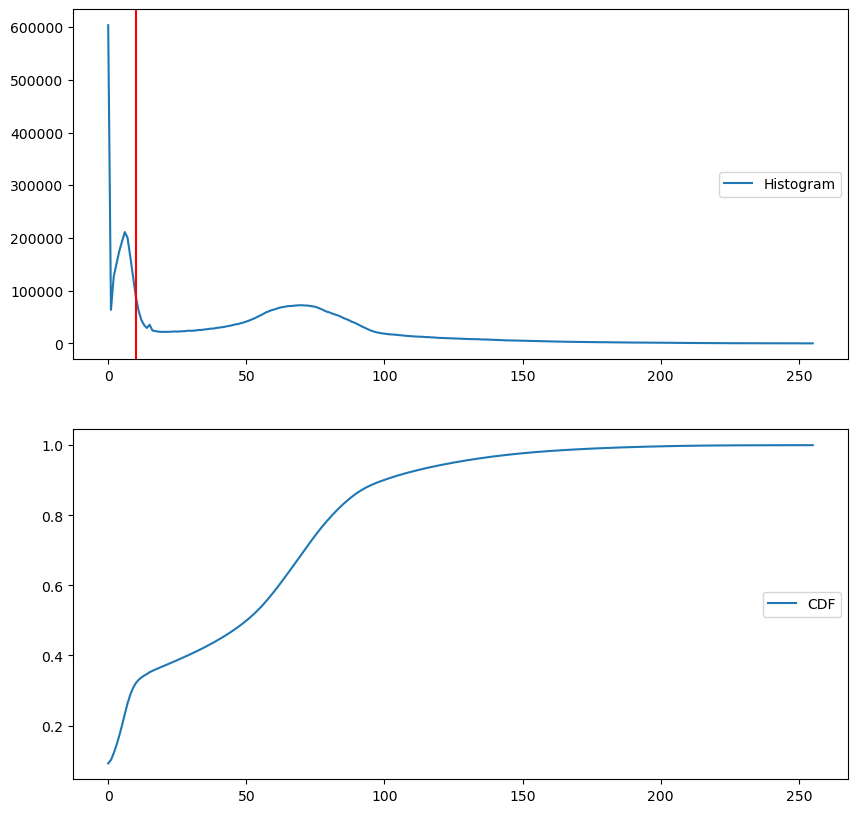

In [255]:
# distributions of different image groupings
hist1 = ndi.histogram(train_im_array[0:30]*255, min=0, max=255, bins=256)
cdf1 = hist1.cumsum() / hist1.sum()

hist2 = ndi.histogram(train_im_array[400:500]*255, min=0, max=255, bins=256)
cdf2 = hist2.cumsum() / hist2.sum()

fig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].plot(hist1, label='Histogram')
axes[0].axvline(x=10, color='r')
axes[1].plot(cdf1, label='CDF')
format_and_render_plot()

# wider view, different subset of images
fig1, axes1 = plt.subplots(2, 1, figsize=(10,10))
axes1[0].plot(hist2, label='Histogram')
axes1[0].axvline(x=10, color='r')
axes1[1].plot(cdf2, label='CDF')
format_and_render_plot()

In [318]:
# use masks - skull stripping? crop neck? 
im_filt = ndi.median_filter(train_im_array*255, size=3)

mask_start = np.where(im_filt>10, 1, 0)
mask = ndi.binary_closing(mask_start)

labels, nlabels = ndi.label(mask)
print(f'Num labels: {nlabels}')

Num labels: 14585


In [ ]:
fig, axes = plt.subplots()
axes[0].imshow(mask, cmap='gray')

In [ ]:
labels = labels.flatten()

In [ ]:
labels

In [ ]:
# Create a `labels` overlay
overlay = np.where(labels>0, labels, np.nan)

# Use imshow to plot the overlay
plt.imshow(overlay, cmap='gray', alpha=0.75)
plt.show()

In [ ]:
# enhance images - brightness, contrast

# could use keras ImageDataGenerator

In [ ]:
# augment images to train on or validate on
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_bone, cmap='gray')

In [ ]:
# build basic model

In [ ]:
# utilize pre-made model